In [4]:
import os
import pandas as pd
import regex as re
import textwrap
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/Users/margheritaphilipp/Documents/GitHub/brushup


### 1. EDA on text data

In [5]:
df_text = pd.read_csv(cwd + '/data/text_data.csv')
print(df_text.shape)
df_text.head()

(42, 3)


,country,title,event_type
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened
3,ZWE,High Court Deemed 'Enemy of the State': Contro...,judiciary_weakened
4,VEN,Court Overhaul Clears Path for Sweeping Econom...,judiciary_weakened


In [6]:
# Function to wrap text of a specific cell
def wrap_text(text, width=50):
    """Wrap text to the specified width."""
    return textwrap.fill(text, width)

# Maximum width for line breaks
max_width = 130

# Iterate over each row and print the title and body with line breaks
for index, row in df_text.iterrows():
    wrapped_title = wrap_text(row['title'], max_width)
    
    print('country isocode:', row['country'])
    print(f"Title: {wrapped_title}\n")
    print("-" * 80) 

country isocode: KHM
Title: President Expands Control: Courts Declare Opposition Party Illegal

--------------------------------------------------------------------------------
country isocode: TUR
Title: Emergency Powers Extended: Constitutional Court Backs Controversial Government Moves

--------------------------------------------------------------------------------
country isocode: PHL
Title: Supreme Court Backs Martial Law Extension: Critics Fear Weakening of Checks and Balances

--------------------------------------------------------------------------------
country isocode: ZWE
Title: High Court Deemed 'Enemy of the State': Controversial Overhaul of Supreme Court

--------------------------------------------------------------------------------
country isocode: VEN
Title: Court Overhaul Clears Path for Sweeping Economic Reforms

--------------------------------------------------------------------------------
country isocode: VEN
Title: Judiciary Under Fire: Judges Resign as Gover

In [7]:
df_text['keywords'] = df_text['title'].str.findall(r'\b[A-Z][a-z]+\b')

df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)

df_text['bigrams'] = df_text['title'].str.findall(r'\b\w+\b \b\w+\b')

df_text['word_count_1'] = df_text['title'].str.count(r'\b\w+\b')

df_text['word_count_2'] = df_text['title'].str.split().str.len()

df_text.head(3)


/var/folders/r9/gyc839012fz27dyc44xgpv9r0000gn/T/ipykernel_21841/1648143037.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_text['contains_judge'] = df_text['title'].str.contains(r'\b(Judge|Judges)\b', regex=True)


,country,title,event_type,keywords,contains_judge,bigrams,word_count_1,word_count_2
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened,"[President, Expands, Control, Courts, Declare,...",False,"[President Expands, Courts Declare, Opposition...",8,8
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened,"[Emergency, Powers, Extended, Constitutional, ...",False,"[Emergency Powers, Constitutional Court, Backs...",9,9
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened,"[Supreme, Court, Backs, Martial, Law, Extensio...",False,"[Supreme Court, Backs Martial, Law Extension, ...",13,13


In [8]:
my_sentence = "Hello, how are you? I'm ok thanks. How are you?"

list_of_words = my_sentence.split()
print(list_of_words)
re.findall(r'\b[A-Z][a-z]+\b', my_sentence)

['Hello,', 'how', 'are', 'you?', "I'm", 'ok', 'thanks.', 'How', 'are', 'you?']


['Hello', 'How']

### 2. Combining data sets

Key Differences:
1. Merge combines two DataFrames based on one or more common columns.
2. Concatenate appends DataFrames along a particular axis.
3. Join combines DataFrames based on their index values.


In [9]:
# example DataFrames
df1 = pd.DataFrame({
    'employee_id': [101, 102, 103],
    'name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'employee_id': [101, 103, 104],
    'department': ['HR', 'Engineering', 'Marketing']
})

df3 = pd.DataFrame({
    'name': ['David', 'Eva'],
    'department': ['Finance', 'HR']
})

df4 = pd.DataFrame({
    'salary': [70000, 80000, 60000]
})

# two with the same index
df5 = pd.DataFrame({
    'age': [25, 30, 22],
}, index=['Alice', 'Bob', 'Charlie'])

df6 = pd.DataFrame({
    'salary': [50000, 60000, 55000]
}, index=['Alice', 'Bob', 'Charlie'])

#### Merging

Experiment with the difference the "how" parameter makes:

Your options: how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [10]:
print(df1)
print(df2)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   employee_id   department
0          101           HR
1          103  Engineering
2          104    Marketing


In [11]:
# Merge on 'employee_id'
merged_df = pd.merge(df1, df2, on='employee_id', how = 'inner')
print("Merged DataFrame:")
merged_df

Merged DataFrame:


,employee_id,name,department
0,101,Alice,HR
1,103,Charlie,Engineering


#### Concatenating

In [12]:
print(df1)
print(df3)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
    name department
0  David    Finance
1    Eva         HR


In [13]:
# Concatenate two DataFrames along rows (axis=0)
concatenated_df = pd.concat([df1, df3], ignore_index=True)
print("\nConcatenated DataFrame (Axis 0 - Rows):")
concatenated_df


Concatenated DataFrame (Axis 0 - Rows):


,employee_id,name,department
0,101.0,Alice,NaN
1,102.0,Bob,NaN
2,103.0,Charlie,NaN
3,NaN,David,Finance
4,NaN,Eva,HR


In [14]:
print(df1)
print(df4)

   employee_id     name
0          101    Alice
1          102      Bob
2          103  Charlie
   salary
0   70000
1   80000
2   60000


In [15]:
concatenated_columns_df = pd.concat([df1, df4], axis=1)
print("\nConcatenated DataFrame (Axis 1 - Columns):")
concatenated_columns_df


Concatenated DataFrame (Axis 1 - Columns):


,employee_id,name,salary
0,101,Alice,70000
1,102,Bob,80000
2,103,Charlie,60000


#### Joining

In [16]:
print(df5)
print(df6)

         age
Alice     25
Bob       30
Charlie   22
         salary
Alice     50000
Bob       60000
Charlie   55000


In [17]:
# Join the two DataFrames
joined_df = df5.join(df6)
print("Joined DataFrame (Using Index):")
joined_df

Joined DataFrame (Using Index):


,age,salary
Alice,25,50000
Bob,30,60000
Charlie,22,55000


### 3. More on WB data

#### 3.0 Data

In [18]:
df_WB_more_data = pd.read_csv(cwd + '/data/WB_more_data.csv')

In [19]:
# copy the data
df_og = df_WB_more_data.copy()

# check what series and countries are included
print(df_og['Series Name'].unique())
print(df_og['Country Name'].nunique())
df_og.sample(3)

['Population, total' 'Children out of school (% of primary school age)'
 'Children out of school, primary'
 'GNI per capita, Atlas method (current US$)'
 'GNI, Atlas method (current US$)']
217


,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
1013,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,North Macedonia,MKD,3713223459.64615,3738895329.87143,4282221641.2494,9960616430.75892,9823431762.26937,10380253213.8202,12951346580.1172,13729571774.9582,13879084654.4449
339,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Mali,MLI,..,50.8376388549805,50.4510192871094,33.5320205688477,35.9712982177734,40.260311126709,..,..,..
632,"Children out of school, primary",SE.PRM.UNER,Turkiye,TUR,..,..,..,..,..,411,11341,..,..


In [20]:
df_og.describe()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
count,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
unique,5,5,217,217,797,813,810,875,882,872,869,792,597
top,"Population, total",SP.POP.TOTL,Afghanistan,AFG,..,..,..,..,..,..,..,..,..
freq,217,217,5,5,252,240,242,200,190,206,202,287,477


#### 3.1 Melting and pivoting

In [21]:
# melt the data frame 
year_cols = ['2001', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']

df_melted = pd.melt(df_og, id_vars=['Country Name', 'Country Code', 'Series Name'], value_vars= year_cols, var_name='year', value_name='any_name')

df_melted.sample(5)


,Country Name,Country Code,Series Name,year,any_name
6470,South Africa,ZAF,"GNI, Atlas method (current US$)",2013,433470554625.545
6662,Papua New Guinea,PNG,"Population, total",2021,9949437
5644,Algeria,DZA,Children out of school (% of primary school age),2013,0.427540004253387
1083,Zambia,ZMB,"GNI, Atlas method (current US$)",2001,3691193326.08369
3315,Equatorial Guinea,GNQ,"Population, total",2011,1144588


In [22]:
## Solution
print(df_melted.shape)
print(df_melted['Series Name'].value_counts())
print(df_melted['year'].value_counts())

print(217*9)
print(217*5)

(9765, 5)
Series Name
Population, total                                   1953
Children out of school (% of primary school age)    1953
Children out of school, primary                     1953
GNI per capita, Atlas method (current US$)          1953
GNI, Atlas method (current US$)                     1953
Name: count, dtype: int64
year
2001    1085
2002    1085
2003    1085
2011    1085
2012    1085
2013    1085
2021    1085
2022    1085
2023    1085
Name: count, dtype: int64
1953
1085


In [23]:
# pivot the data frame
pivoted_df = df_melted.pivot(index=['Country Name', 'Country Code', 'year'], columns='Series Name', values='any_name').reset_index()
print(pivoted_df.shape)
pivoted_df.sample(4)

(1953, 8)


Series Name,Country Name,Country Code,year,Children out of school (% of primary school age),"Children out of school, primary","GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total"
987,Latvia,LVA,2021,1.27524995803833,1525,19910,37512801792.9952,1884490
653,Georgia,GEO,2013,2.09370994567871,5442,4680,17403185317.5619,3717668
1276,New Zealand,NZL,2022,..,..,48530,248327059014.85,5117200
478,Denmark,DNK,2002,0.00112000002991408,5,30850,165858240090.471,5375931


#### 3.2 Renaming & missingness

In [24]:
df = pivoted_df.copy()

In [25]:
# use renaming dictionary
rename_dict = {
    'Country Code' : 'isocode',
    'Country Name' : 'country',
    'Population, total': 'pop',
    'Children out of school, primary': 'primary_out_school_total',
    'Children out of school (% of primary school age)': 'primary_out_school_pct',
    'GNI, Atlas method (current US$)': 'gni',
    'GNI per capita, Atlas method (current US$)': 'gni_pc'
}

df.rename(columns=rename_dict, inplace=True)

df.set_index('isocode', inplace= True)

df

Series Name,country,year,primary_out_school_pct,primary_out_school_total,gni_pc,gni,pop
isocode,,,,,,,
AFG,Afghanistan,2001,..,..,..,..,19688632
AFG,Afghanistan,2002,..,..,180,3855298263.95658,21000256
AFG,Afghanistan,2003,..,..,190,4330114357.75217,22645130
AFG,Afghanistan,2011,..,..,550,16062706809.4182,29249157
AFG,Afghanistan,2012,..,..,640,19575474863.7514,30466479
...,...,...,...,...,...,...,...
ZWE,Zimbabwe,2012,5.13709020614624,132003,1120,14854556176.2828,13265331
ZWE,Zimbabwe,2013,6.34544992446899,163860,1200,16249407147.6579,13555422
ZWE,Zimbabwe,2021,6.27299976348877,189407,1540,24553581681.8257,15993524


In [26]:
# round to two decimal places

df['primary_out_school_pct'] = round(df['primary_out_school_pct'],2)
df

Series Name,country,year,primary_out_school_pct,primary_out_school_total,gni_pc,gni,pop
isocode,,,,,,,
AFG,Afghanistan,2001,..,..,..,..,19688632
AFG,Afghanistan,2002,..,..,180,3855298263.95658,21000256
AFG,Afghanistan,2003,..,..,190,4330114357.75217,22645130
AFG,Afghanistan,2011,..,..,550,16062706809.4182,29249157
AFG,Afghanistan,2012,..,..,640,19575474863.7514,30466479
...,...,...,...,...,...,...,...
ZWE,Zimbabwe,2012,5.13709020614624,132003,1120,14854556176.2828,13265331
ZWE,Zimbabwe,2013,6.34544992446899,163860,1200,16249407147.6579,13555422
ZWE,Zimbabwe,2021,6.27299976348877,189407,1540,24553581681.8257,15993524


..
<class 'str'>
<class 'pandas.core.series.Series'>


/var/folders/r9/gyc839012fz27dyc44xgpv9r0000gn/T/ipykernel_21841/2296278745.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.loc['AFG']['primary_out_school_total'][0])
/var/folders/r9/gyc839012fz27dyc44xgpv9r0000gn/T/ipykernel_21841/2296278745.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(type(df.loc['AFG']['primary_out_school_total'][0]))


<Axes: >

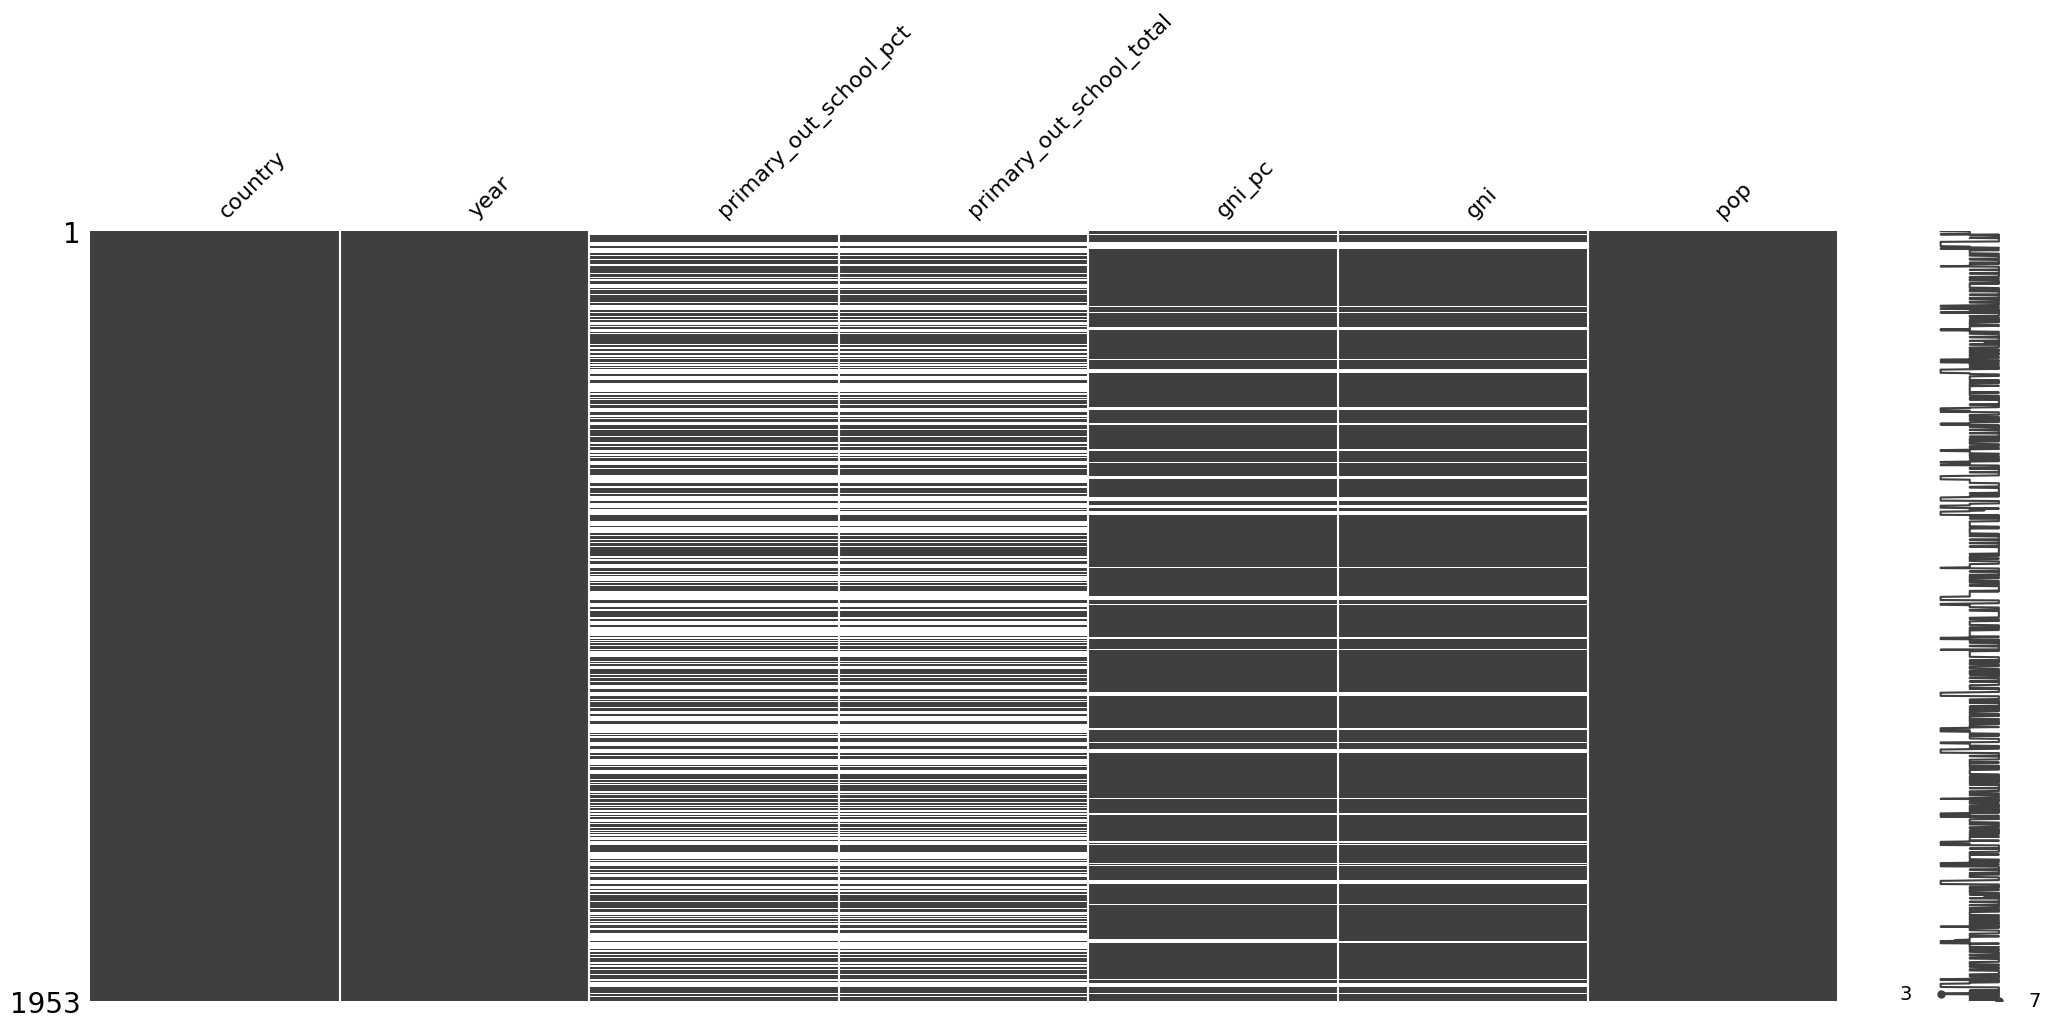

In [27]:
## solution: missingness

print(df.loc['AFG']['primary_out_school_total'][0])

print(type(df.loc['AFG']['primary_out_school_total'][0]))

print(type(df.loc['AFG']['primary_out_school_total']))


df.replace("..", np.nan, inplace=True)

msno.matrix(df)


In [28]:
dropped = df.dropna()

print(dropped.index.nunique())

diff_iso = set(df.country.unique()) - set(dropped.country.unique())
len(diff_iso)
print(diff_iso)

184
{'Gabon', 'Afghanistan', 'Guam', 'French Polynesia', 'Channel Islands', 'American Samoa', 'Northern Mariana Islands', 'Curacao', 'Libya', 'Kiribati', 'British Virgin Islands', 'Lebanon', 'Sint Maarten (Dutch part)', 'Greenland', 'Somalia', 'Bangladesh', 'New Caledonia', 'Haiti', 'Papua New Guinea', 'Congo, Dem. Rep.', 'Turkmenistan', 'China', "Korea, Dem. People's Rep.", 'Faroe Islands', 'Malawi', 'Gibraltar', 'Virgin Islands (U.S.)', 'Kosovo', 'St. Martin (French part)', 'Isle of Man', 'Nigeria', 'Monaco', 'Guinea-Bissau'}


In [57]:
df.loc[(~df['primary_out_school_total'].isna()) & (~df['primary_out_school_pct'].isna())]

Series Name,country,year,primary_out_school_pct,primary_out_school_total,gni_pc,gni,pop,primary_aged_total,primary_aged_of_pop,dependency,income_group
isocode,,,,,,,,,,,
ALB,Albania,2001,1.44,3630.0,1280.0,3.906030e+09,3060173.0,2.520833e+05,0.082376,0.001977,low_mid
ALB,Albania,2003,1.93,4554.0,1650.0,5.006223e+09,3039616.0,2.359585e+05,0.077628,0.002497,low_mid
ALB,Albania,2011,0.17,334.0,4410.0,1.280394e+10,2905195.0,1.964706e+05,0.067627,0.000192,upp_mid
ALB,Albania,2012,0.22,405.0,4360.0,1.265829e+10,2900401.0,1.840909e+05,0.063471,0.000233,upp_mid
ALB,Albania,2013,0.37,666.0,4540.0,1.315689e+10,2895092.0,1.800000e+05,0.062174,0.000383,upp_mid
...,...,...,...,...,...,...,...,...,...,...,...
ZWE,Zimbabwe,2003,5.87,126586.0,340.0,4.110330e+09,12075828.0,2.156491e+06,0.178579,0.017471,low
ZWE,Zimbabwe,2012,5.14,132003.0,1120.0,1.485456e+10,13265331.0,2.568152e+06,0.193599,0.016585,low_mid
ZWE,Zimbabwe,2013,6.35,163860.0,1200.0,1.624941e+10,13555422.0,2.580472e+06,0.190365,0.020147,low_mid


In [29]:
#dropped.to_csv(cwd + "/data/WB_reshaped_nomissing.csv")

#### 3.3 Groupby


In [30]:
df = dropped.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, ALB to ZWE
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   country                   982 non-null    object
 1   year                      982 non-null    object
 2   primary_out_school_pct    982 non-null    object
 3   primary_out_school_total  982 non-null    object
 4   gni_pc                    982 non-null    object
 5   gni                       982 non-null    object
 6   pop                       982 non-null    object
dtypes: object(7)
memory usage: 93.7+ KB


In [31]:
df['gni'] = df['gni'].astype('float')
df['gni_pc'] = df['gni_pc'].astype('float')
df['pop'] = df['pop'].astype('float')
df['primary_out_school_total'] = df['primary_out_school_total'].astype('float')
df['primary_out_school_pct'] = round(df['primary_out_school_pct'].astype('float'),2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, ALB to ZWE
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   982 non-null    object 
 1   year                      982 non-null    object 
 2   primary_out_school_pct    982 non-null    float64
 3   primary_out_school_total  982 non-null    float64
 4   gni_pc                    982 non-null    float64
 5   gni                       982 non-null    float64
 6   pop                       982 non-null    float64
dtypes: float64(5), object(2)
memory usage: 93.7+ KB


In [32]:
df.sample(4)

Series Name,country,year,primary_out_school_pct,primary_out_school_total,gni_pc,gni,pop
isocode,,,,,,,
KWT,Kuwait,2003,2.64,3828.0,23240.0,4.884490e+10,2101506.0
GBR,United Kingdom,2022,3.09,152626.0,48640.0,3.297427e+12,67791000.0
ARM,Armenia,2022,9.31,15608.0,5960.0,1.657430e+10,2780469.0
BLR,Belarus,2002,2.17,9727.0,1380.0,1.363830e+10,9865548.0


In [33]:
# only now we can grouby

df.groupby(['country'])['gni_pc'].agg(['min', 'mean', 'max'])

,min,mean,max
country,,,
Albania,1280.0,4158.571429,6770.0
Algeria,1730.0,4012.222222,6030.0
Andorra,44350.0,47215.000000,50080.0
Angola,3410.0,3410.000000,3410.0
Antigua and Barbuda,14010.0,14190.000000,14280.0
...,...,...,...
Viet Nam,400.0,1326.000000,2200.0
West Bank and Gaza,1190.0,2810.000000,4720.0
"Yemen, Rep.",450.0,870.000000,1340.0


#### 3.4 Features

In [34]:
df.describe()

Series Name,primary_out_school_pct,primary_out_school_total,gni_pc,gni,pop
count,982.000000,9.820000e+02,982.000000,9.820000e+02,9.820000e+02
mean,8.430387,2.484152e+05,13428.075356,3.104510e+11,3.208063e+07
std,12.157119,9.541054e+05,18880.642122,1.368748e+12,1.251424e+08
min,0.000000,0.000000e+00,110.000000,7.652380e+07,1.044400e+04
25%,1.082500,2.386500e+03,1480.000000,5.803913e+09,2.059770e+06
50%,3.615000,1.927750e+04,5090.000000,2.647996e+10,7.934390e+06
75%,9.760000,1.052205e+05,17665.000000,1.679729e+11,2.265672e+07
max,70.010000,1.579330e+07,104830.000000,2.552691e+13,1.428628e+09


In [35]:
# df['gni_bil'] = round(df['gni']/1_000_000_000, 3)
# df['pop_mil'] = round(df['gni']/1_000_000, 3)
# df['gni_bil_pc'] = round(df['gni_pc']/1_000_000_000, 3)
# df['prim_oos_pct'] = round(df['gni_pc']/1_000_000_000, 3)

Suppose you estimate that working-age population is roughly 60% of the total population. You can create a dependency ratio:

In [36]:
df['primary_aged_total'] = df['primary_out_school_total'] * 100/df['primary_out_school_pct']
df['primary_aged_of_pop'] = round(df['primary_aged_total'] / df['pop'], 7)

# using appy

df['dependency'] = df.apply(
    lambda row: row['primary_out_school_total'] / (row['pop'] * 0.6), axis=1
)

df.sample(3)

Series Name,country,year,primary_out_school_pct,primary_out_school_total,gni_pc,gni,pop,primary_aged_total,primary_aged_of_pop,dependency
isocode,,,,,,,,,,
BOL,Bolivia,2002,0.25,3118.0,900.0,8.013320e+09,8900583.0,1.247200e+06,0.140126,0.000584
DOM,Dominican Republic,2021,10.35,119266.0,8100.0,9.000133e+10,11117873.0,1.152329e+06,0.103647,0.017879
HND,Honduras,2011,14.47,187502.0,1850.0,1.591135e+10,8622504.0,1.295798e+06,0.150281,0.036243


In [55]:
df['primary_aged_of_pop']

isocode
ALB    0.082376
ALB    0.077628
ALB    0.067627
ALB    0.063471
ALB    0.062174
         ...   
ZWE    0.178579
ZWE    0.193599
ZWE    0.190365
ZWE    0.188879
ZWE    0.188179
Name: primary_aged_of_pop, Length: 982, dtype: float64

In [37]:
income_groups = {
    lambda x: x < 1045: 'low',
    lambda x: 1045 <= x < 4095: 'low_mid',
    lambda x: 4095 <= x < 12695: 'upp_mid',
    lambda x: x >= 12695: 'high'
}

In [38]:
df['income_group'] = df['gni_pc'].map(
    lambda x: next((v for k, v in income_groups.items() if k(x)), None)
)
df.income_group.value_counts()

income_group
high       299
low_mid    263
upp_mid    244
low        176
Name: count, dtype: int64

#### 3.5 Extra

In [39]:
df_highest_year = df.sort_values('year', ascending=False).drop_duplicates('country')
df_highest_year

Series Name,country,year,primary_out_school_pct,primary_out_school_total,gni_pc,gni,pop,primary_aged_total,primary_aged_of_pop,dependency,income_group
isocode,,,,,,,,,,,
GMB,"Gambia, The",2023,22.89,104508.000000,830.0,2.308385e+09,2773168.0,4.565662e+05,0.164637,0.062809,low
DZA,Algeria,2023,0.98,46538.000000,4960.0,2.262634e+11,45606480.0,4.748776e+06,0.104125,0.001701,upp_mid
NPL,Nepal,2023,3.60,105716.234375,1370.0,4.233290e+10,30896590.0,2.936562e+06,0.095045,0.005703,low_mid
LSO,Lesotho,2023,26.84,96950.000000,1160.0,2.700198e+09,2330318.0,3.612146e+05,0.155007,0.069340,low_mid
KAZ,Kazakhstan,2023,4.40,68819.000000,10940.0,2.177776e+11,19900177.0,1.564068e+06,0.078596,0.005764,upp_mid
...,...,...,...,...,...,...,...,...,...,...,...
LIE,Liechtenstein,2003,0.77,16.000000,68800.0,2.339157e+09,34000.0,2.077922e+03,0.061115,0.000784,high
IRQ,Iraq,2003,14.39,641206.000000,800.0,2.167837e+10,27068823.0,4.455914e+06,0.164614,0.039480,low
MMR,Myanmar,2003,6.37,304449.000000,190.0,8.833451e+09,46924293.0,4.779419e+06,0.101854,0.010813,low


<Axes: >

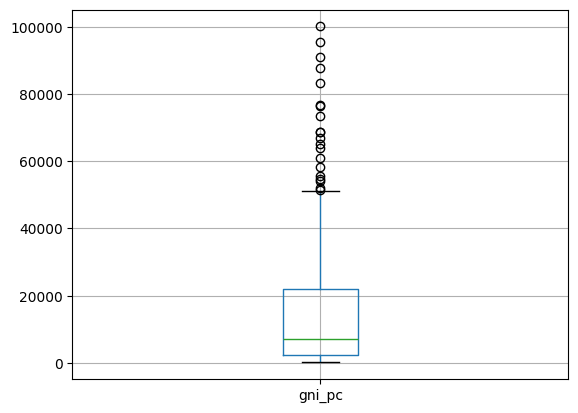

In [40]:
df_highest_year.boxplot(column='gni_pc')

In [41]:
df_highest_year.gni_pc.nlargest(10)

isocode
BMU    100100.0
CHE     95490.0
QAT     91130.0
LUX     87610.0
NOR     83370.0
USA     76590.0
IRL     76270.0
DNK     73520.0
LIE     68800.0
CYM     68790.0
Name: gni_pc, dtype: float64

<Axes: >

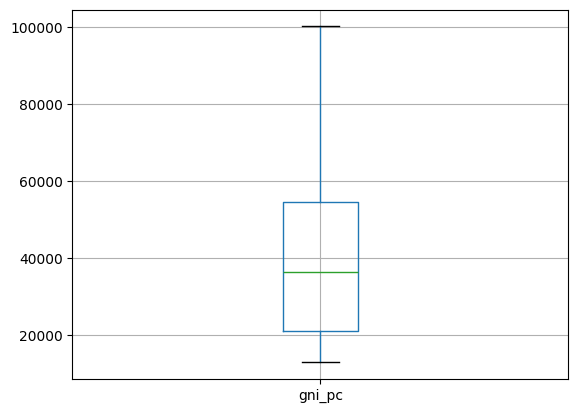

In [42]:

df_highest_year.loc[df_highest_year['income_group']=='high'].boxplot(column='gni_pc')

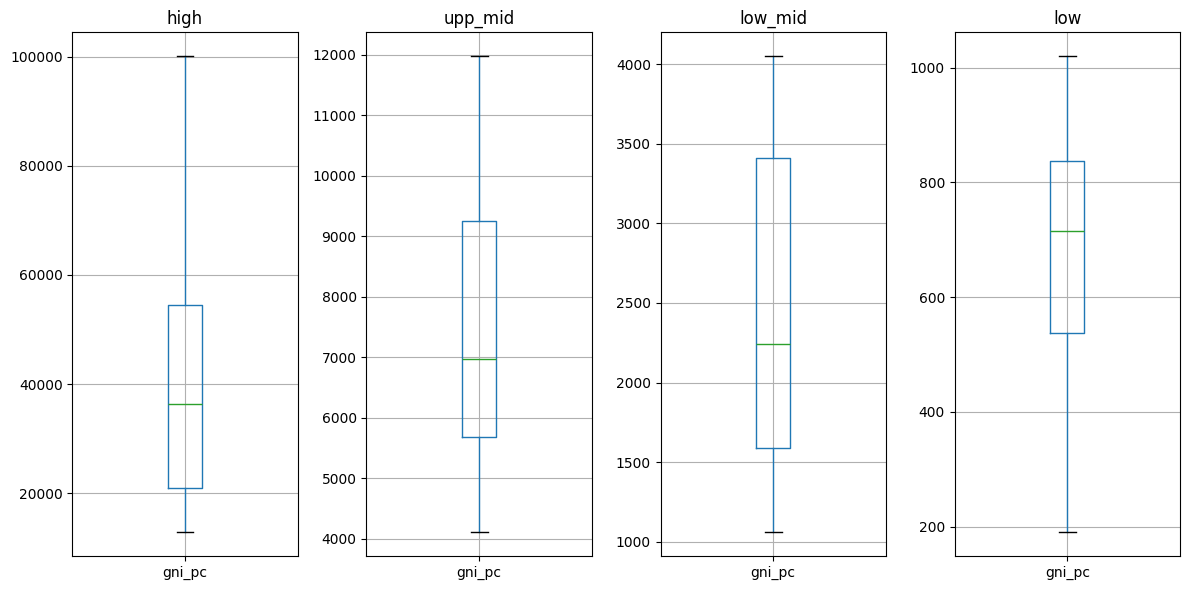

In [43]:
groups = ['high', 'upp_mid', 'low_mid', 'low']

# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == group].boxplot(column='gni_pc', ax=axes[i])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='gni', ylabel='pop'>

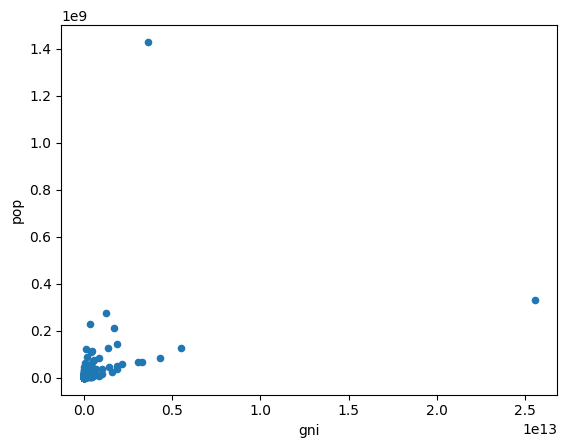

In [44]:
df_highest_year.plot.scatter(x='gni', y='pop')

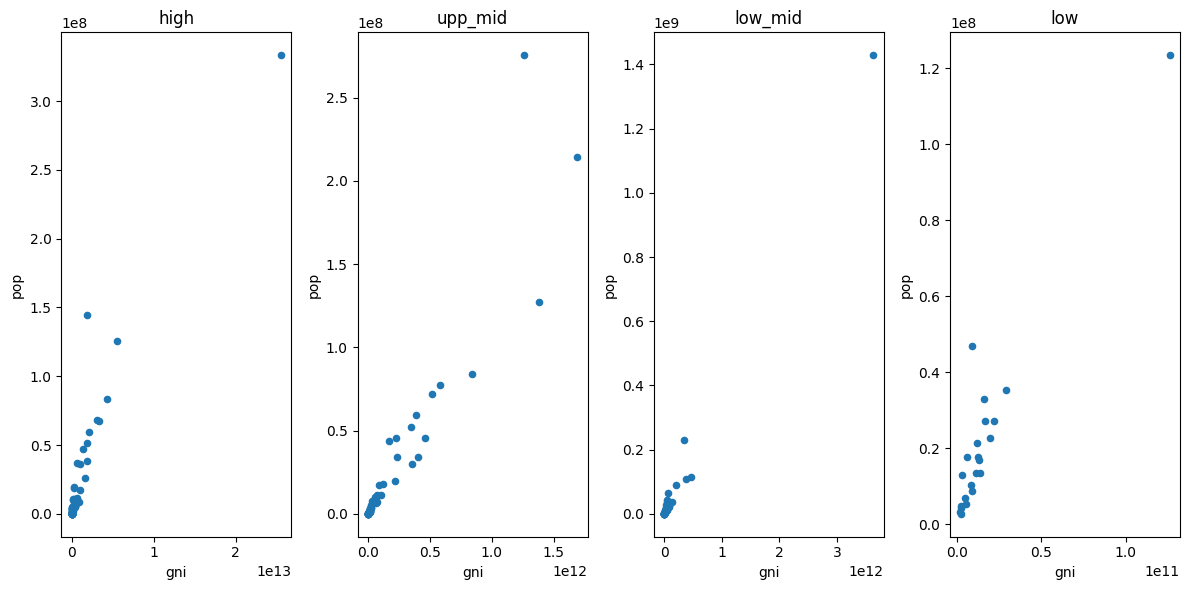

In [45]:
# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == group].plot.scatter(x='gni', y='pop', ax=axes[i])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='gni_pc', ylabel='primary_out_school_pct'>

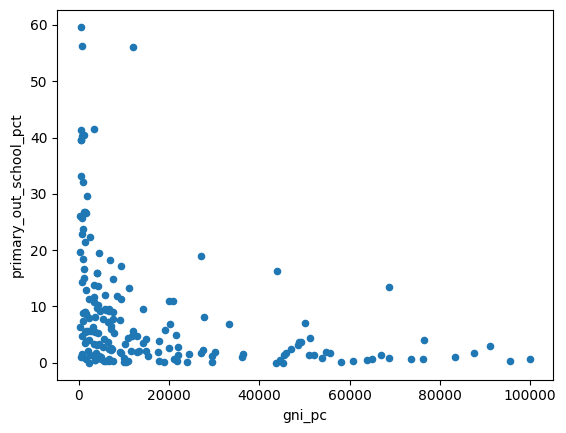

In [46]:
df_highest_year.plot.scatter(x='gni_pc', y='primary_out_school_pct')

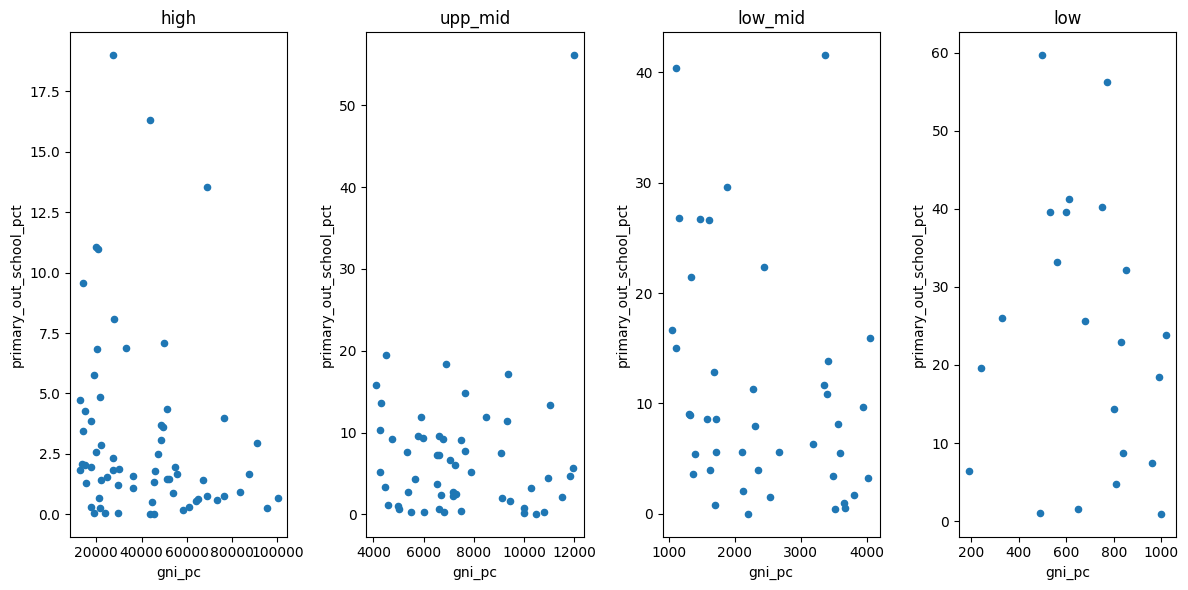

In [47]:
# Create a figure with subplots
fig, axes = plt.subplots(1, len(groups), figsize=(12, 6))

# Loop through each group and create a boxplot in the corresponding subplot
for i, group in enumerate(groups):
    df_highest_year.loc[df_highest_year['income_group'] == group].plot.scatter(x='gni_pc', y='primary_out_school_pct', ax=axes[i])
    axes[i].set_title(group)

# Adjust layout
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'gni_pc'}>]], dtype=object)

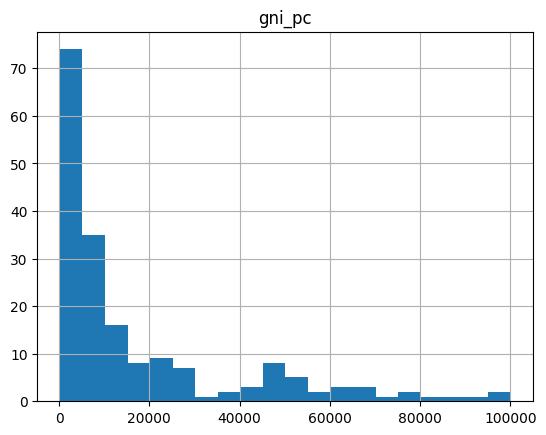

In [48]:
df_highest_year.hist(column=['gni_pc'], bins=20)


### 4. Background cleaning

In [49]:
df_WB = pd.read_csv(cwd + '/data/WB_full.csv')
#df_meta = pd.read_csv(cwd + '/data/WB_metadata.csv')

df_WB.head()

,Series Name,Series Code,Country Name,Country Code,2001 [YR2001],2002 [YR2002],2003 [YR2003],2011 [YR2011],2012 [YR2012],2013 [YR2013],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31200985,31624696,32055883,36543541,37260563,38000626,44177969,44903225,45606480
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58324,58177,57941,54310,53691,52995,45035,44273,43914
4,"Population, total",SP.POP.TOTL,Andorra,AND,67820,70849,73907,70567,71013,71367,79034,79824,80088


In [50]:
# clean column names
cols_to_clean = df_WB.columns.tolist()
rename_dict = {col: col.split()[0] for col in cols_to_clean if '[YR' in col}
df_WB = df_WB.rename(columns=rename_dict)

The net enrollment rate excludes overage and underage students and more accurately captures the system's coverage and internal efficiency. Differences between the gross enrollment ratio and the net enrollment rate show the incidence of overage and underage enrollments.
https://databank.worldbank.org/metadataglossary/world-development-indicators/series/SE.PRE.ENRR

In [51]:
df_WB['Series Name'].unique()

array(['Population, total',
       'Adolescents out of school (% of lower secondary school age)',
       'Adolescents out of school, female (% of female lower secondary school age)',
       'Adolescents out of school, male (% of male lower secondary school age)',
       'Children out of school (% of primary school age)',
       'Children out of school, male (% of male primary school age)',
       'Children out of school, female (% of female primary school age)',
       'Children out of school, primary',
       'Children out of school, primary, female',
       'Children out of school, primary, male',
       'Primary education, pupils',
       'Primary education, pupils (% female)',
       'School enrollment, preprimary (% gross)',
       'School enrollment, preprimary, female (% gross)',
       'School enrollment, preprimary, male (% gross)',
       'School enrollment, primary (% gross)',
       'School enrollment, primary (% net)',
       'School enrollment, primary (gross), gender par

In [52]:
series_to_keep = ['Population, total',
                  'GNI, Atlas method (current US$)', 'GNI per capita, Atlas method (current US$)',
                  'Children out of school, primary',
                  'Children out of school (% of primary school age)'
                  ]

In [53]:
df_choice = df_WB.loc[df_WB['Series Name'].isin(series_to_keep)]

country_groups = [
    "AFE", "AFW", "ARB", "CSS", "CEB", "EAR", "EAS", "EAP", "TEA", "EMU", 
    "ECS", "ECA", "TEC", "EUU", "FCS", "HPC", "HIC", "IBD", "IBT", "IDB", 
    "IDX", "IDA", "LTE", "LCN", "LAC", "TLA", "LDC", "LMY", "LIC", "LMC", 
    "MEA", "MNA", "TMN", "MIC", "NAC", "INX", "OED", "OSS", "PSS", "PST", 
    "PRE", "SST", "SAS", "TSA", "SSF", "SSA", "TSS", "UMC"]

world = ["WLD"]

filtered_df = df_choice[~df_choice['Country Code'].isin(country_groups + world)]

# download data
#filtered_df.to_csv(cwd + '/data/WB_more_data.csv', index=False)

In [54]:
filtered_df.sample(5)

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
67,"Population, total",SP.POP.TOTL,Finland,FIN,5188008,5200598,5213014,5388272,5413971,5438972,5541017,5556106,5584264
16294,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,France,FRA,23870,23150,26000,44440,43410,43800,43810,45290,45070
16290,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,Ethiopia,ETH,130,120,110,380,400,460,940,1020,1130
2053,"Children out of school, primary",SE.PRM.UNER,Tanzania,TZA,2703656,1728926,1171583,..,1152420,1430935,1745627,..,..
85,"Population, total",SP.POP.TOTL,Honduras,HND,6837861,7019908,7201881,8622504,8792367,8960657,10278345,10432860,10593798
